In [ ]:
pip install jitcdde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jitcdde: filename=jitcdde-1.8.1-py3-none-any.whl size=55003 sha256=1130df65a5767ca87c8baab704fd8fd42cacab9f14fc6562a6fff4947ef53346
  Stored in directory: /root/.cache/pip/wheels/42/e3/4e/94b61188e5e3e62ba27e9586da5ecc7ea0f24e26916a250cc7
  Created wheel for chspy: filename=CHSPy-1.2.2-py3-none-any.whl size=11999 sha256=3a1cd33569520ddd38d641e0ba9d2b87506a30a0269a7ab1fb09e8e8cdbe44fc
  Stored in directory: /root/.cache/pip/wheels/11/17/24/0cca70842afd051f54325b813e637d8e8836d88c286ba63fae
  Created wheel for jitcxde_common: filename=jitcxde_common-1.5.4-py3-none-any.whl size=16755 sha256=6be78f10b4100348d04beb48cdd23321a368e7ff1a74ac0903342c0f87607cb9
  Stored in directory: /root/.cache

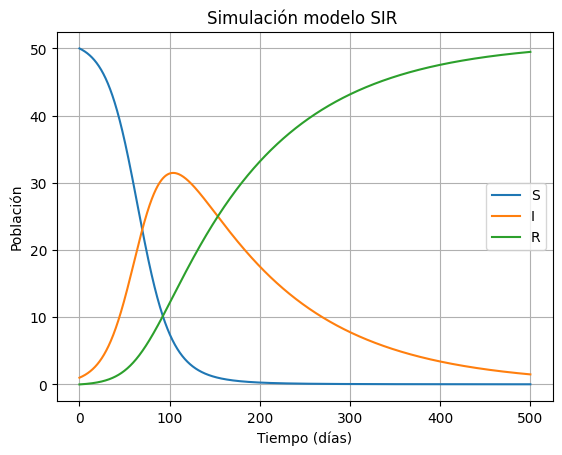

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SIR model equations
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]


"""
Initial conditions (such as S0, I0, and R0) are not to be random but I hardcoded them with specific values. These choices are typically made based on the characteristics of the disease being modeled and the context of the simulation. Initial condition are set such that S0 = 99%, which indicates the proportion of susceptible individuals when the simulation starts. I0 is set to 1%, which indicates proportion of infected individuals to be 1% when the simulation starts. R0 is set to 0% which is expected that there are are no recovered individuals when the simulations start.
"""
S0 = 50.
I0 = 1.
R0 = 0.
y0 = [S0, I0, R0]

# Parameters
# β (beta) is transmission rate and I chose 30%. γ (gamma) is set to 1%
beta = 0.0013
gamma = 0.0083

# Time vector
t = np.linspace(0, 500, 2000)  # Simulate for 200 days

# Solve the SIR model equations using odeint()
solution = odeint(SIR_model, y0, t, args=(beta, gamma))

# Extract results
S, I, R = solution.T

# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(t, S, label='S')
plt.plot(t, I, label='I')
plt.plot(t, R, label='R')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Simulación modelo SIR ')
plt.legend()
plt.grid(True)
plt.savefig('SIR.png')

Generating, compiling, and loading C code.
Using default integration parameters.


/usr/local/lib/python3.10/dist-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/usr/local/lib/python3.10/dist-packages/jitcdde/_jitcdde.py:792: UserWarning: The target time is smaller than the current time. 

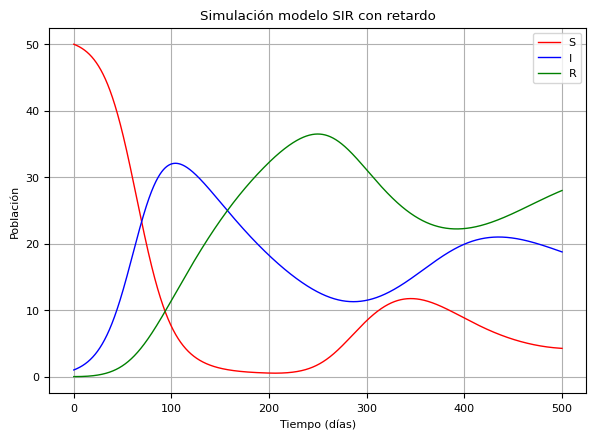

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import symengine
from jitcdde import jitcdde, y, t

beta = 0.0013
omega = 0.0083

d=symengine.symbols("d")
equations=[
  omega*y(1,t-d) - beta*y(1, t)*y( 0 , t ),
	beta*y(1, t)*y(0, t)-omega*y(1,t),
	omega*y(1, t)-omega*y(1,t-d)]

ddesys = jitcdde(equations, control_pars=[d], max_delay=300.)

plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(1, 1)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

ts = np.linspace(0, 500, 20000)

ddesys.constant_past([50., 1.,0.])
params=[200.]
ddesys.set_parameters(*params)
ys = []
for t in ts:
	ys.append(ddesys.integrate(t))
ys=np.array(ys)

axs.plot(ts, ys[:,0], color='red', linewidth=1,label='S')
axs.plot(ts, ys[:,1], color='blue', linewidth=1,label='I')
axs.plot(ts, ys[:,2], color='green', linewidth=1,label='R')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Simulación modelo SIR con retardo')
plt.legend()
plt.grid(True)
plt.savefig('SIRR.png')

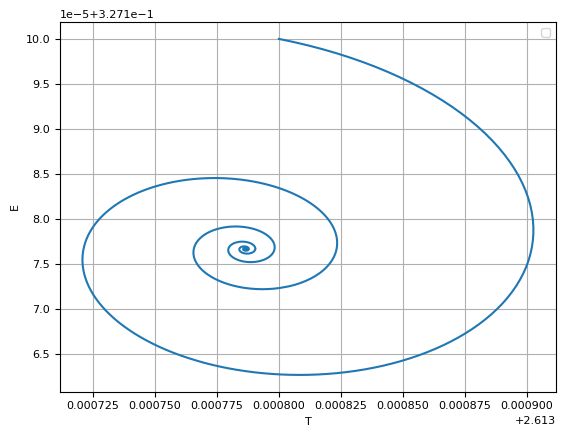

In [ ]:
def Tumor_model(y,t,r,K,n,omega,miu,nu):
    T,E = y
    dTdt = r*T*(1-(T/K))-n*E*T
    dEdt = omega+miu*T*E-nu*E
    return [dTdt, dEdt]

T0 = 0.3272
E0 = 2.6138
y0 = [T0, E0]

r=2.5
K=2.
n=0.8
omega=0.5
miu=4.
nu=1.5

# Time vector
t = np.linspace(0, 5000, 200000)  # Simulate for 200 days

# Solve the SIR model equations using odeint()
solution = odeint(Tumor_model, y0, t, args=(r,K,n,omega,miu,nu))

# Extract results
T,E = solution.T

# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(E, T)
plt.xlabel('T')
plt.ylabel('E')
plt.legend()
plt.grid(True)

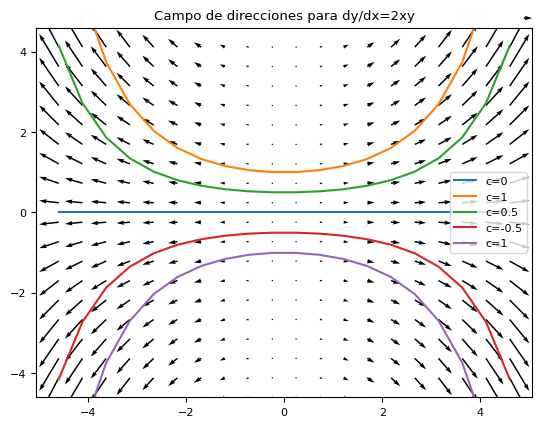

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-4.6, 4.6, 20)
c0=0
c1 = 1
c2 = 0.5
c3 = -0.5
c4 = -1
X, Y = np.meshgrid(np.linspace(-4.6, 4.6, 20),np.linspace(-4.6, 4.6, 20))
V = (0.2*(X**2)*Y)/2
U = X

fig1, ax1 = plt.subplots()
ax1.set_title('Campo de direcciones para dy/dx=2xy')
ax1.plot(x,c0*np.exp(0.1*x**2),label='c=0')
ax1.plot(x,c1*np.exp(0.1*x**2),label='c=1')
ax1.plot(x,c2*np.exp(0.1*x**2),label='c=0.5')
ax1.plot(x,c3*np.exp(0.1*x**2),label='c=-0.5')
ax1.plot(x,c4*np.exp(0.1*x**2),label='c=1')
Q = ax1.quiver(X,Y, U,V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.ylim([-4.6,4.6])
plt.legend()
plt.savefig('VF.png')

In [ ]:
%matplotlib notebook

In [ ]:
pip install neurodiffeq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.4 MB/s eta 0:00:00
  Created wheel for neurodiffeq: filename=neurodiffeq-0.6.3-py3-none-any.whl size=132420 sha256=7ec284fe870a51e66b6b6b2cc2c6a4aff73351d452c0f83a3f660a920e734425
  Stored in directory: /root/.cache/pip/wheels/f6/e7/71/84c06f693bbf2ffd52a7c5ecd416c2a2ac053569b283171ddf
Successfully built neurodiffeq


In [ ]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv
from neurodiffeq.monitors import Monitor1D
import torch.nn as nn
from neurodiffeq.networks import Swish
import numpy as np

In [ ]:
def ode_system(u, v, t):
    return [diff(u,t)-(u-u*v), diff(v,t)-(u*v-v)]

conditions = [IVP(t_0=0.0, u_0=1.5), IVP(t_0=0.0, u_0=1.0)]
nets = [FCNN(actv=SinActv), FCNN(actv=SinActv)]
solver = Solver1D(ode_system, conditions, t_min=0.1, t_max=12.0, nets=nets)
solver.fit(max_epochs=3000)
solution = solver.get_solution()

Training Progress:   0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
t=np.linspace(0.,12.,2000)
u, v = solution(t, to_numpy=True)  # t can be np.ndarray or torch.Tensor

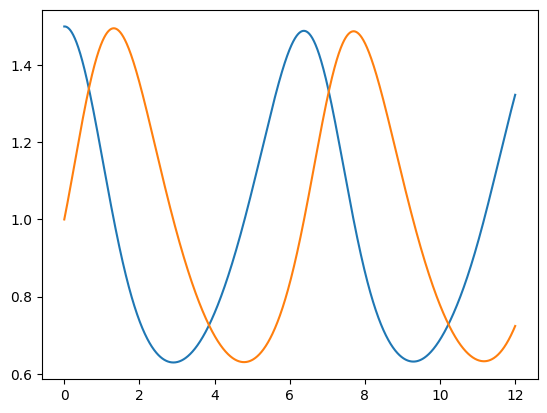

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t,u)
plt.plot(t,v)
plt.show()

In [ ]:
print(u)
print(v)

[1.5        1.50006472 1.50009363 ... 1.31451849 1.31673572 1.31894734]
[1.         1.00300018 1.00601284 ... 0.71795701 0.71932941 0.72071303]


Training Progress:   0%|          | 0/3000 [00:00<?, ?it/s]

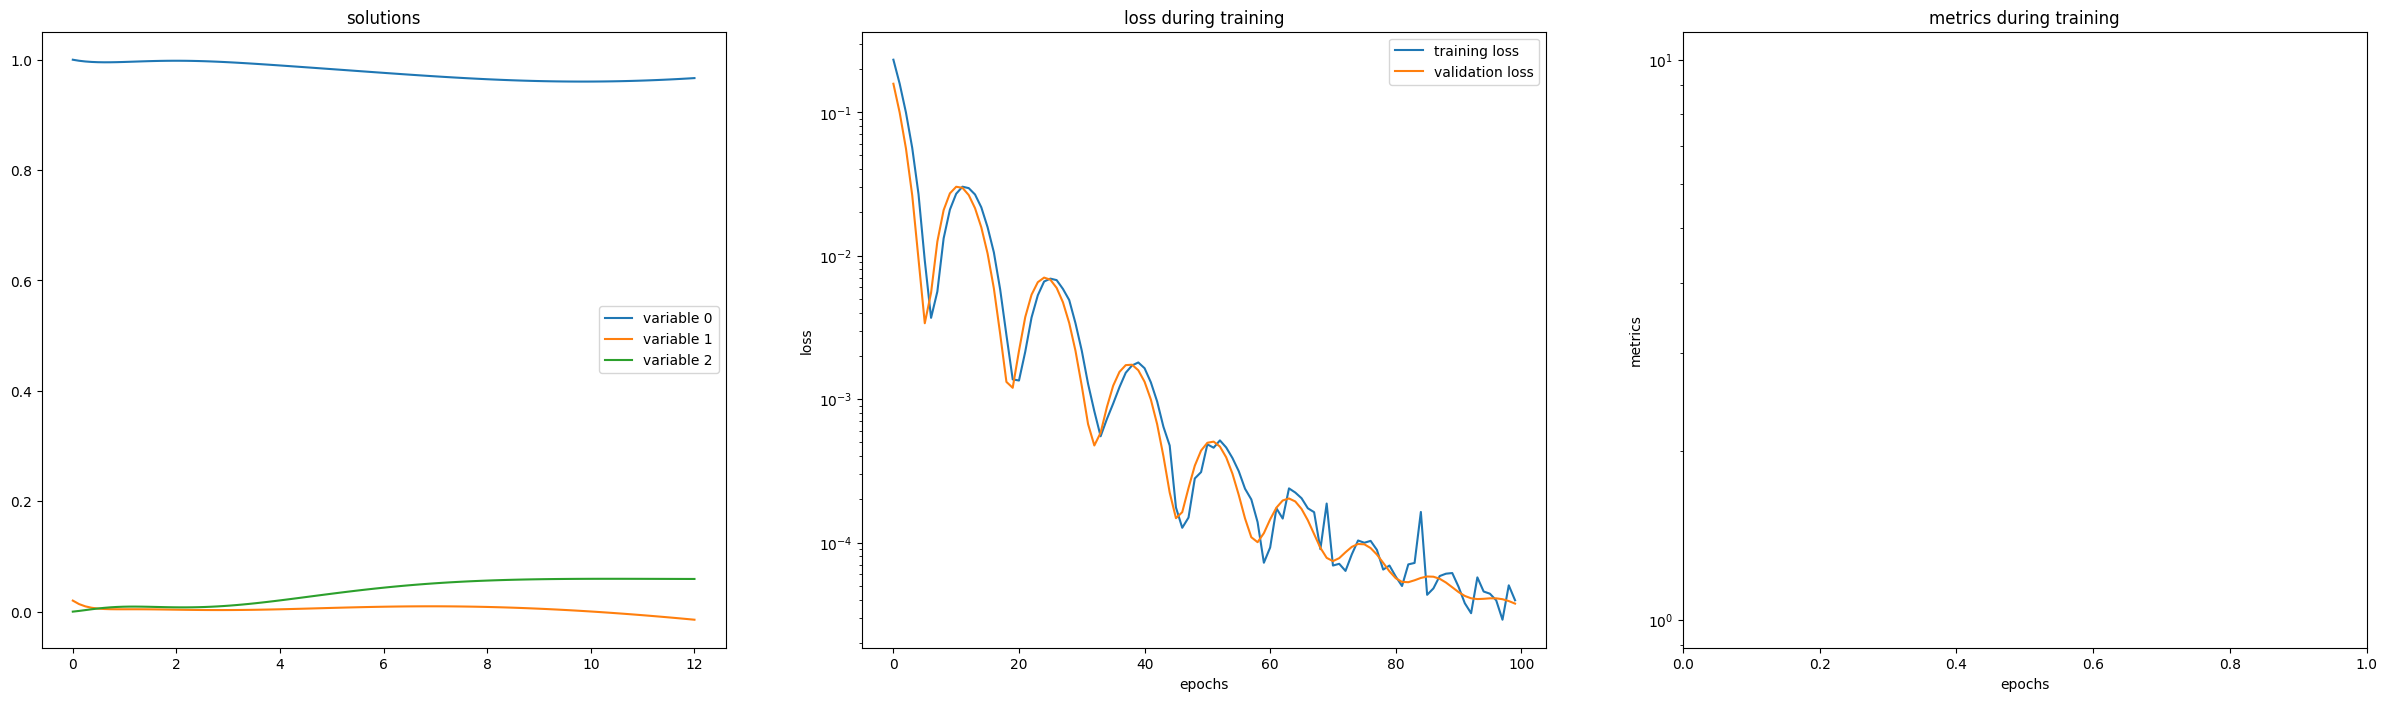

In [ ]:
def SIR_system(s, i, r, t):
    beta = 0.5
    gamma = 0.83
    return [diff(s,t)+(beta * s * i), diff(i,t)-(beta * s * i - gamma * i), diff(r,t)-(gamma * i)]

conditions = [IVP(t_0=0.0, u_0=1.), IVP(t_0=0.0, u_0=1./50.), IVP(t_0=0.0, u_0=0.0)]
nets = [FCNN(actv=Swish), FCNN(actv=Swish), FCNN(actv=Swish)]
solver = Solver1D(SIR_system, conditions, t_min=0.1, t_max=12.0, nets=nets)
monitor = Monitor1D(t_min=0.0, t_max=12.0, check_every=100)
solver.fit(max_epochs=3000, callbacks=[monitor.to_callback()])
solution = solver.get_solution()

In [46]:
!pip install diffrax equinox optax